In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
import random

## SGD for SVM

In [2]:
def SVM_dual(X, y, C, num_iterations):
    n = len(y)
    learning_rate = 1 / np.diagonal(np.dot(X, X.T))
    K = np.dot(X, X.T)
    alpha = np.zeros(n)
    for count in range(num_iterations):
        for k in range(n):  
            # gradient = 1 - y[k] * np.sum(alpha * y * K[:, k]) (slow)           
            gradient = 1 - y[k] * np.dot(alpha, y * K[:, k])
            alpha[k] += learning_rate[k] * gradient
            alpha[k] = 0 if alpha[k] < 0 else C if alpha[k] > C else alpha[k]

    return alpha

In [3]:
def find_accuracy(X_test, y_test, weights):
    dec_bound = np.dot(test[:, :-1], weights)
    y_pred = np.ones(len(test))
    y_pred[dec_bound < 0] = -1
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

## Dataset 1 - Skin Segmentation

### a. Preprocess Data

In [4]:
skins_nonskin = np.genfromtxt('Skin_NonSkin.txt')

numPoints = 1000
skin = skins_nonskin[:numPoints, :]
nonskin = skins_nonskin[50859:(50859 + numPoints) , :]

skin_norm = skin[:,:3] / 255
nonskin_norm = nonskin[:,:3] / 255
skin = np.c_[skin_norm, skin[:, -1]]
nonskin = np.c_[nonskin_norm, nonskin[:, -1]]

#shuffle dataset
np.random.shuffle(skin)
np.random.shuffle(nonskin)

# split dataset
split_skin = len(skin) // 3
split_nonskin = len(nonskin) // 3
test_skin, train_skin = skin[:split_skin], skin[split_skin:]
test_nonskin, train_nonskin = nonskin[:split_nonskin], nonskin[split_nonskin:]

# combine 2 datasets : skin and non-skin into 1 dataset
train = np.r_[train_skin, train_nonskin]
test = np.r_[test_skin, test_nonskin]

# shuffle one more time
np.random.shuffle(train)
np.random.shuffle(test)

# separate between X and y
# X_train = train[:, :-1]
# y_train = train[:, -1]
# X_test = test[:, :-1]
# y_test = test[:, -1]

X_train = train[:, [0, 1]]
y_train = train[:, -1]
X_test = test[:, [0, 1]]
y_test = test[:, -1]



# covert y into the form: +1 and -1
y_train[y_train != 1] = -1
y_test[y_test != 1] = -1

# add 1 at the end of X
X_train = np.insert(X_train, X_train.shape[1], 1, axis = 1)
X_test = np.insert(X_test, X_test.shape[1], 1, axis = 1)

#print (np.corrcoef(X_train[:, 0], X_train[:, 1]))
#print (np.corrcoef(X_train[:, 0], y_train))

In [5]:
print(X_train)
print(X_test)

[[ 0.29411765  0.32941176  1.        ]
 [ 0.71372549  0.70196078  1.        ]
 [ 0.29411765  0.35294118  1.        ]
 ..., 
 [ 0.71372549  0.70196078  1.        ]
 [ 0.28235294  0.3254902   1.        ]
 [ 0.63921569  0.63529412  1.        ]]
[[ 0.81176471  0.84313725  1.        ]
 [ 0.30588235  0.3372549   1.        ]
 [ 0.31372549  0.35294118  1.        ]
 ..., 
 [ 0.75686275  0.75294118  1.        ]
 [ 0.79607843  0.83529412  1.        ]
 [ 0.73333333  0.72941176  1.        ]]


### b. Train Data

In [6]:
alpha = SVM_dual(X_train, y_train, C = 600, num_iterations = 1000)

### c. Support Vectors

In [7]:
weights = np.dot(y_train * alpha, X_train)
print("Decision boundary:")
print(weights[0], "x1 +", weights[1], "x2 +", weights[2])
support_vectors = np.where(alpha > 0)
print("Support Vectors:") 
print(support_vectors[0])

Decision boundary:
-84.6866909509 x1 + 84.5807824079 x2 + -1.25443840556
Support Vectors:
[   9   11   12   13   46   48   50   58   82   85   88   91  102  106  108
  110  114  118  122  139  148  152  167  182  201  224  229  238  246  258
  262  266  275  276  278  286  287  291  298  305  323  329  337  343  349
  351  354  360  361  370  375  376  383  390  394  402  404  419  425  430
  439  445  446  450  458  459  463  474  482  491  499  508  588  592  597
  607  638  651  657  672  673  679  680  694  695  698  700  706  713  719
  731  735  736  740  745  749  763  790  793  795  799  811  816  819  820
  821  827  837  845  849  852  856  858  868  871  874  879  881  888  990
  993  994 1009 1023 1030 1032 1034 1051 1052 1063 1075 1086 1116 1118 1120
 1122 1123 1130 1133 1136 1145 1146 1148 1153 1154 1158 1166 1167 1189 1196
 1201 1215 1216 1220 1226 1233 1234 1237 1239 1241 1242 1255 1264 1265 1273
 1275 1290 1306 1317 1325]


### d. Test Data
Accuracy ~ 96%

In [8]:
accuracy = find_accuracy(X_test, y_test, weights)
print("Accuracy:", accuracy)

Accuracy: 0.977477477477


### e. Visualize
Support vectors are green

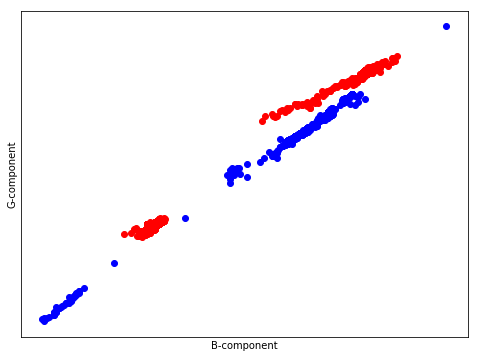

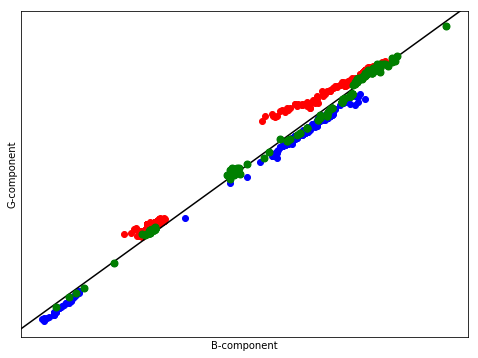

In [9]:
x_min, x_max = X_train[:, 0].min() - .05, X_train[:, 0].max() + .05
y_min, y_max = X_train[:, 1].min() - .05, X_train[:, 1].max() + .05
plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
X_pos = X_train[y_train == 1]
X_neg = X_train[y_train == -1]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color="red")
plt.scatter(X_neg[:, 0], X_neg[:, 1], color="blue")

plt.xlabel('B-component')
plt.ylabel('G-component')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
X_pos = X_train[y_train == 1]
X_neg = X_train[y_train == -1]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color="red")
plt.scatter(X_neg[:, 0], X_neg[:, 1], color="blue")

x = np.r_[-5 : 10 : 0.5]
plt.plot(x, -(weights[0]/weights[1]) * x -(weights[2]/weights[1]), label = 'manual', color = 'black')

for r in support_vectors[0]:
    plt.plot(X_train[r][0], X_train[r][1], marker='o', markersize=7, color="green")

plt.xlabel('B-component')
plt.ylabel('G-component')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Dataset 2 - Iris

### a. Preprocess Data

In [10]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target[:]

#convert output to +1 and -1
y[y != 0] = -1
y[y == 0] = 1

# add 1 at the end
X = np.insert(X, X.shape[1], 1, axis = 1)

# shuffle dataset
a = np.c_[X, y]
np.random.shuffle(a)
split = len(a) // 3
test, train = a[:split], a[split:]
#print(test)

X_train = train[:, :3]
y_train = train[:, 3]
X_test = test[:, :3]
y_test = test[:, 3]

#print (np.corrcoef(X_train[:, 0], X_train[:, 1]))
#print (np.corrcoef(X_train[:, 0], y_train))
#print (np.corrcoef(X_train[:, 1], y_train))

### b. Train Data

In [11]:
alpha = SVM_dual(X_train, y_train, C = 10, num_iterations = 500)

### c. Support Vectors

In [12]:
weights = np.dot(y_train * alpha, X_train)
print("Decision boundary:")
print(weights[0], "x1 +", weights[1], "x2 +", weights[2])
support_vectors = np.where(alpha > 0)
print("Support Vectors:") 
print(support_vectors[0])

Decision boundary:
-2.90514758139 x1 + 3.91151862889 x2 + 3.38863360128
Support Vectors:
[ 1  5 10 15 20 23 36 66 68 75 83]


### d. Test Data

In [13]:
accuracy = find_accuracy(X_test, y_test, weights)
print("Accuracy:", accuracy)

Accuracy: 1.0


### e. Visualize

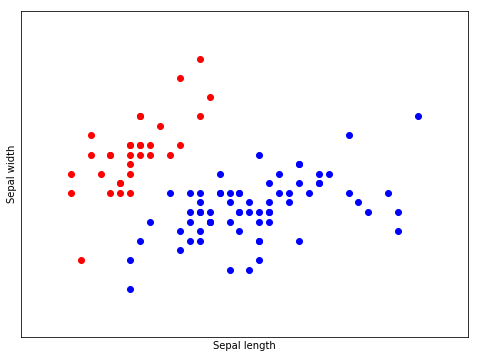

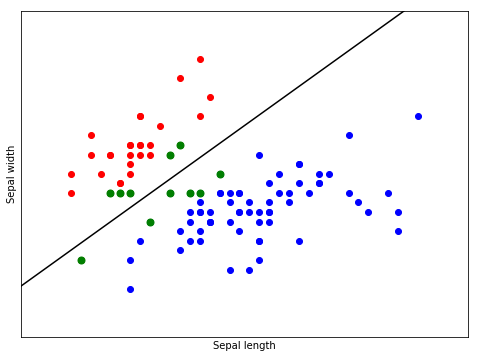

In [14]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
plt.figure(1, figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.clf()

X_pos = X_train[y_train == 1]
X_neg = X_train[y_train == -1]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color="red")
plt.scatter(X_neg[:, 0], X_neg[:, 1], color="blue")

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(2, figsize=(8, 6))
plt.clf()
X_pos = X_train[y_train == 1]
X_neg = X_train[y_train == -1]

plt.scatter(X_pos[:, 0], X_pos[:, 1], color="red")
plt.scatter(X_neg[:, 0], X_neg[:, 1], color="blue")

x = np.r_[-5 : 10 : 0.5]
plt.plot(x, -(weights[0]/weights[1]) * x -(weights[2]/weights[1]), label = 'manual', color = 'black')

for r in support_vectors[0]:
    plt.plot(X_train[r][0], X_train[r][1], marker='o', markersize=7, color="green")

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Dataset 3: Pima Indians Diabetes

### a. Preprocess Data

In [15]:
diabetes = np.genfromtxt('pima-indians-diabetes.data', delimiter = ",")

In [16]:
X = diabetes[:, :-1]  # we only take the first two features.
y = diabetes[:, -1]
y[y == 0] = -1

# shuffle dataset
a = np.c_[X, y]
np.random.shuffle(a)
split = len(a) // 3
test, train = a[:split], a[split:]

X_train = train[:, :-1]
y_train = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]



### b. Train Data

In [17]:
alpha = SVM_dual(X_train, y_train, C = 10, num_iterations = 3000)

### c. Support Vectors

In [18]:
weights = np.dot(y_train * alpha, X_train)
support_vectors = np.where(alpha > 0)
print("Support Vectors")
print(support_vectors[0])

Support Vectors
[  2   6   7   8   9  10  13  15  16  17  18  19  20  23  24  27  28  29
  30  31  32  33  36  37  39  40  41  42  44  46  47  48  49  50  51  52
  53  54  56  58  59  60  62  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  87  88  89  90  92  93  96  97  98
  99 100 101 102 103 104 105 106 109 110 113 114 117 121 122 126 127 128
 130 131 132 133 134 135 136 137 138 139 141 142 143 145 146 147 148 149
 150 151 152 153 154 155 156 157 159 161 163 164 165 166 167 168 169 170
 171 178 179 180 181 182 183 184 185 186 187 188 189 190 193 196 197 198
 199 205 206 208 210 212 214 215 216 217 221 223 226 227 228 229 230 231
 232 233 235 236 238 240 242 243 244 245 247 248 249 250 253 255 256 257
 258 259 260 261 262 263 264 265 266 268 269 270 271 272 273 276 277 278
 279 281 283 284 286 287 288 294 295 297 298 299 300 301 302 304 305 306
 307 308 309 310 312 313 314 315 317 318 319 320 321 324 325 326 327 331
 332 333 334 335 336 339 340 342 34

### d. Test Data

In [19]:
accuracy = find_accuracy(X_test, y_test, weights)
print("Accuracy:", accuracy)

Accuracy: 0.6328125
